# ***WORKSHOP-5***
## ***NAME: ARCHANA T***
## ***REGISTER NUMBER :212223240013***

Saving img_3.jpg to img_3.jpg


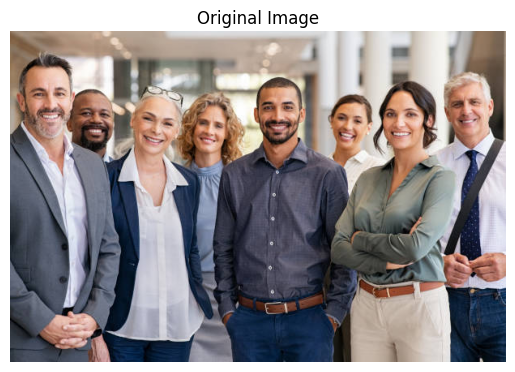

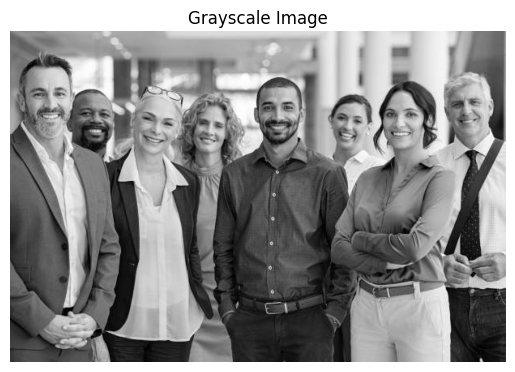

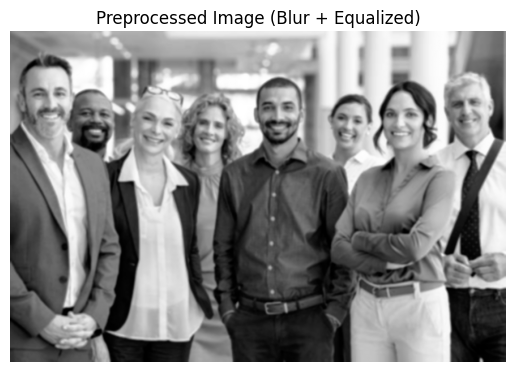

Total Faces Detected: 9
9 face(s) saved in 'Detected_Faces' folder.


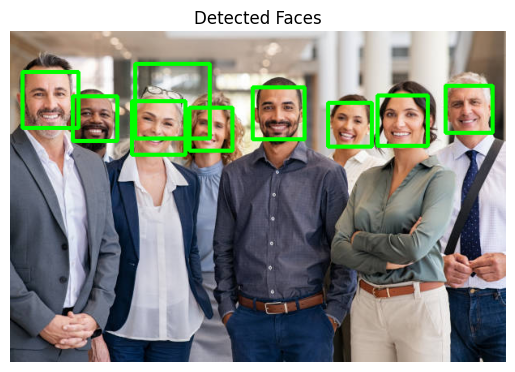

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import urllib.request
from google.colab import files
import numpy as np
uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
equalized = cv2.equalizeHist(blurred)

plt.imshow(equalized, cmap='gray')
plt.title("Preprocessed Image (Blur + Equalized)")
plt.axis('off')
plt.show()
cascade_path = 'haarcascade_frontalface_default.xml'
if not os.path.exists(cascade_path):
    print("Cascade file not found. Downloading...")
    url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
    urllib.request.urlretrieve(url, cascade_path)
    print("Cascade file downloaded successfully!")

face_cascade = cv2.CascadeClassifier(cascade_path)
faces = face_cascade.detectMultiScale(
    equalized,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)
print(f"Total Faces Detected: {len(faces)}")
output = image.copy()
save_dir = "Detected_Faces"
os.makedirs(save_dir, exist_ok=True)

for i, (x, y, w, h) in enumerate(faces):
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    face_crop = image[y:y+h, x:x+w]
    save_path = f"{save_dir}/face_{i+1}.jpg"
    cv2.imwrite(save_path, face_crop)

if len(faces) > 0:
    print(f"{len(faces)} face(s) saved in '{save_dir}' folder.")
else:
    print("No faces detected. Try adjusting parameters or using a clearer image.")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis('off')
plt.show()
